In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv('synthetic_fraud_dataset.csv')

# Display the first few rows
print(df.head())
# Display dataset information
print(df.info())
# Display summary statistics
print(df.describe())

  Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                   

In [2]:
# Check for missing values
print(df.isnull().sum())

# Optionally, drop rows with missing values
df = df.dropna()


Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


In [3]:
# Sum of all transaction amounts
total_transaction_amount = df['Transaction_Amount'].sum()

# Average transaction amount
average_transaction_amount = df['Transaction_Amount'].mean()

print(f"Total Transaction Amount: {total_transaction_amount}")
print(f"Average Transaction Amount: {average_transaction_amount}")


Total Transaction Amount: 4970550.61
Average Transaction Amount: 99.4110122


In [4]:
# Check if a column like 'device_type' exists in the dataset
if 'Device_Type' in df.columns:
    most_fraudulent_device = df[df['Fraud_Label'] == 1]['Device_Type'].mode()[0]
    print(f"Most Frequent Fraud Transaction Device: {most_fraudulent_device}")


Most Frequent Fraud Transaction Device: Tablet


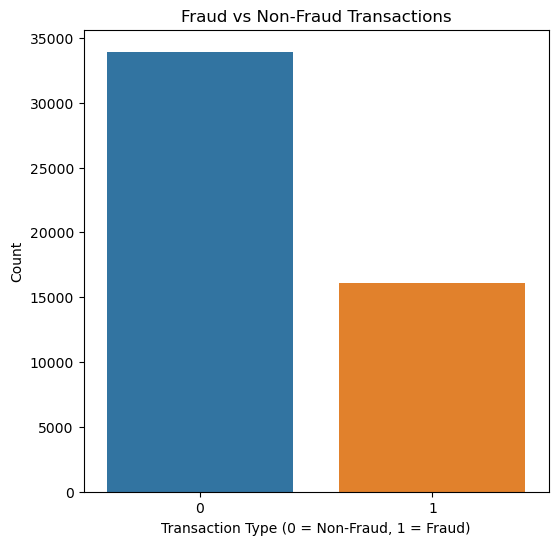

In [5]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Fraud_Label'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


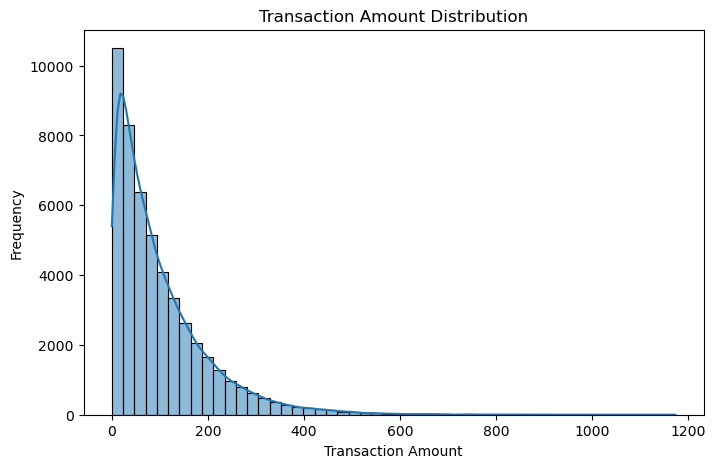

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['Transaction_Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


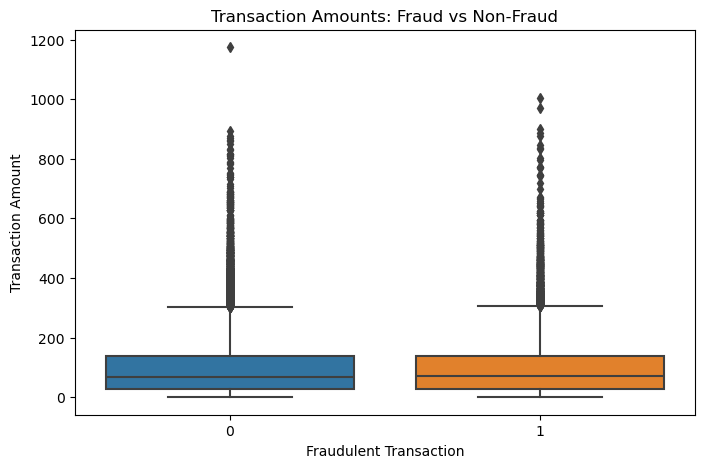

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fraud_Label'], y=df['Transaction_Amount'])
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Fraudulent Transaction")
plt.ylabel("Transaction Amount")
plt.show()


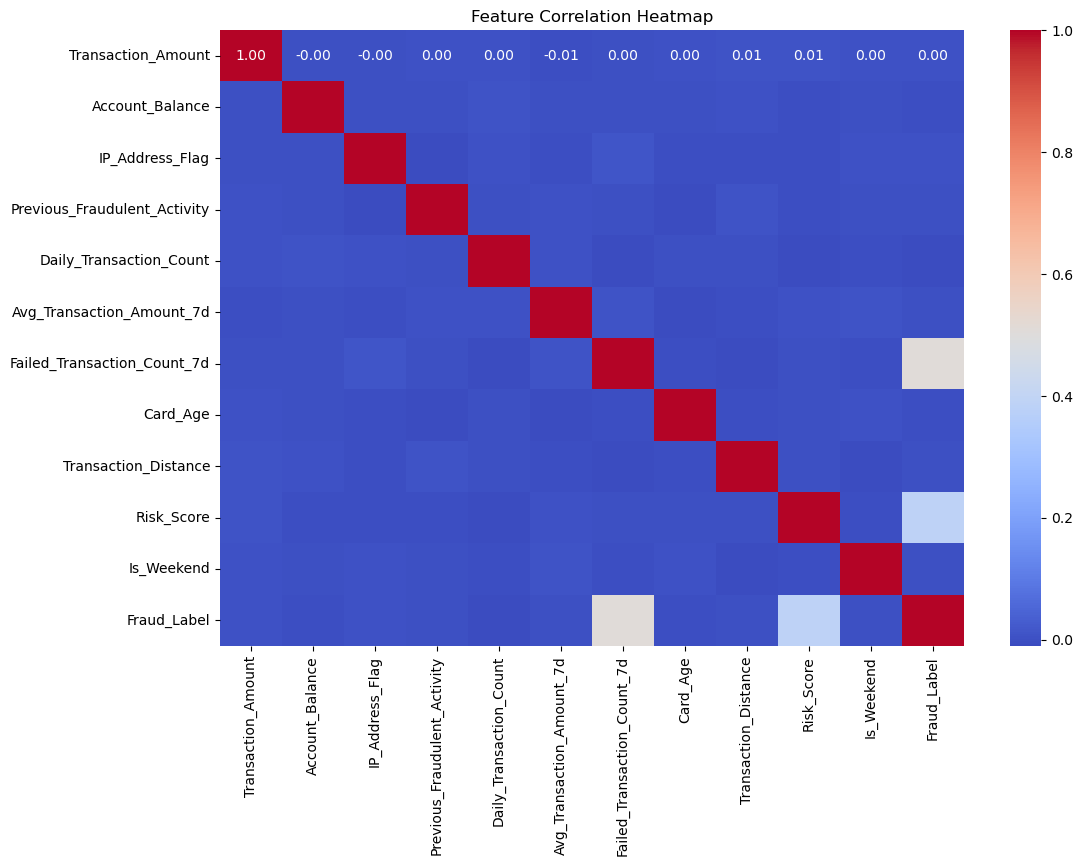

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


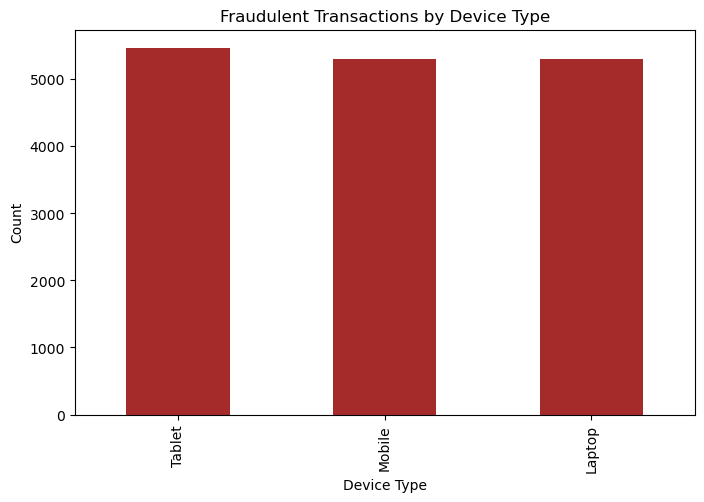

In [9]:
if 'Device_Type' in df.columns:
    plt.figure(figsize=(8,5))
    fraud_devices = df[df['Fraud_Label'] == 1]['Device_Type'].value_counts()
    fraud_devices.plot(kind='bar', color='brown')
    plt.title("Fraudulent Transactions by Device Type")
    plt.xlabel("Device Type")
    plt.ylabel("Count")
    plt.show()


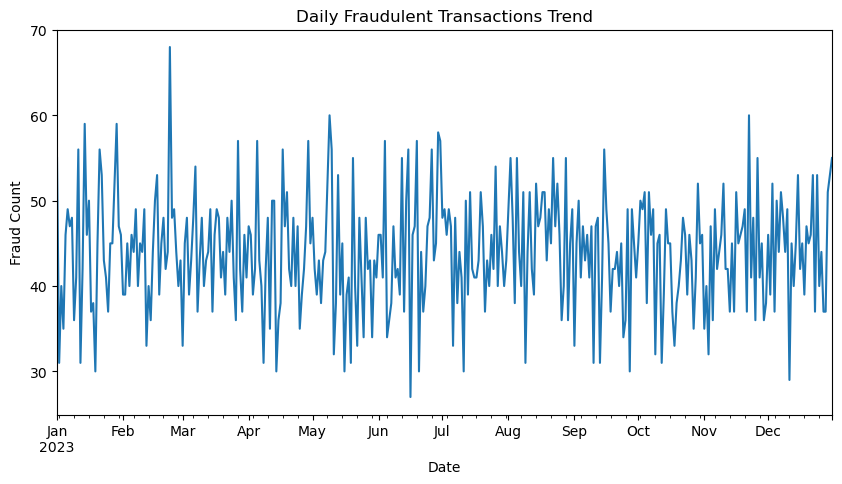

In [10]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    
    plt.figure(figsize=(10,5))
    df['Fraud_Label'].resample('D').sum().plot()
    plt.title("Daily Fraudulent Transactions Trend")
    plt.xlabel("Date")
    plt.ylabel("Fraud Count")
    plt.show()


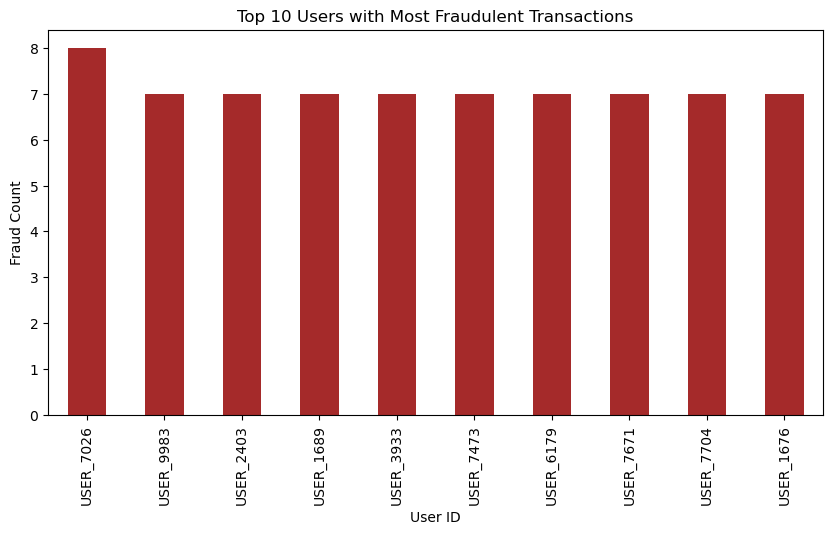

In [11]:
if 'User_ID' in df.columns:
    top_fraud_users = df[df['Fraud_Label'] == 1]['User_ID'].value_counts().head(10)
    
    plt.figure(figsize=(10, 5))
    top_fraud_users.plot(kind='bar', color='brown')
    plt.title("Top 10 Users with Most Fraudulent Transactions")
    plt.xlabel("User ID")
    plt.ylabel("Fraud Count")
    plt.show()


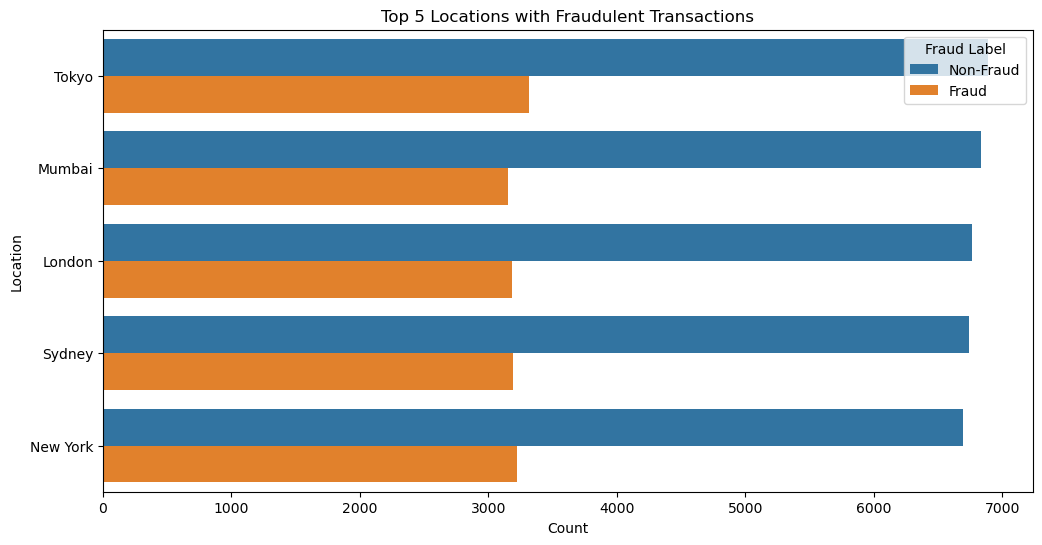

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Fraud_Label' to categorical type if needed
df['Fraud_Label'] = df['Fraud_Label'].astype(str)  # Convert integer labels to string

### Step 9: Top 10 Locations with Fraudulent Transactions
if 'Location' in df.columns:
    country_order = df['Location'].value_counts().index[:10]

    plt.figure(figsize=(12, 6))
    sns.countplot(y='Location', hue='Fraud_Label', data=df, order=country_order)
    
    plt.title('Top 5 Locations with Fraudulent Transactions')
    plt.xlabel('Count')
    plt.ylabel('Location')
    
    # Explicitly define legend labels
    plt.legend(title='Fraud Label', labels=['Non-Fraud', 'Fraud'])
    
    plt.show()
else:
    print("Error: 'Location' column is missing in DataFrame")


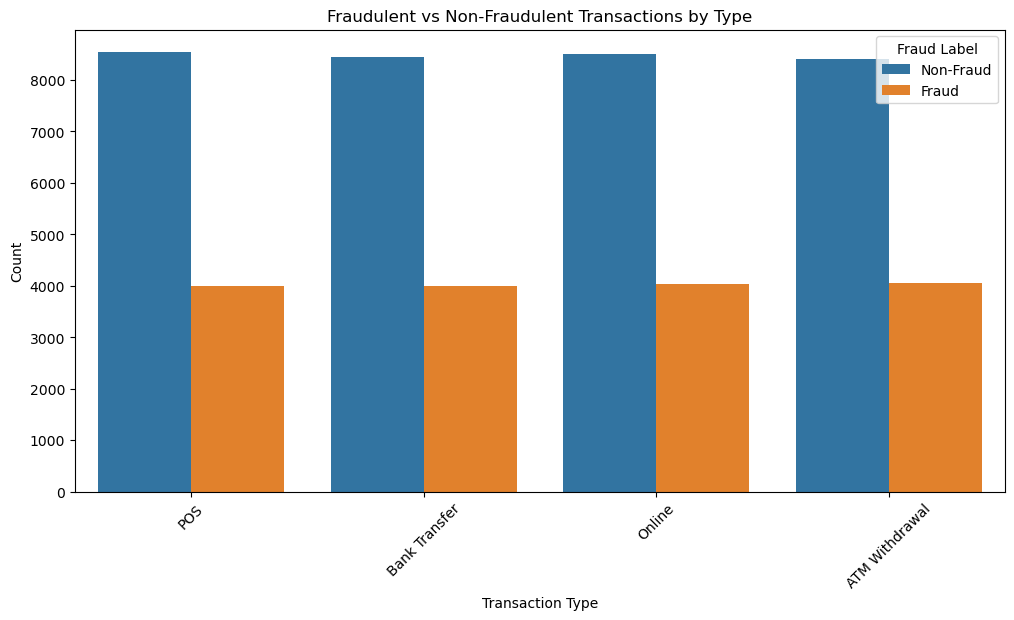

In [18]:

# Convert 'Fraud_Label' to categorical type if needed
df['Fraud_Label'] = df['Fraud_Label'].astype(str)  # Convert integer labels to string

if 'Transaction_Type' in df.columns:
    plt.figure(figsize=(12, 6),dpi=100)
    sns.countplot(x='Transaction_Type', hue='Fraud_Label', data=df)
    plt.title('Fraudulent vs Non-Fraudulent Transactions by Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', labels=['Non-Fraud', 'Fraud'])
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: 'Transaction_Type' column is missing in DataFrame")


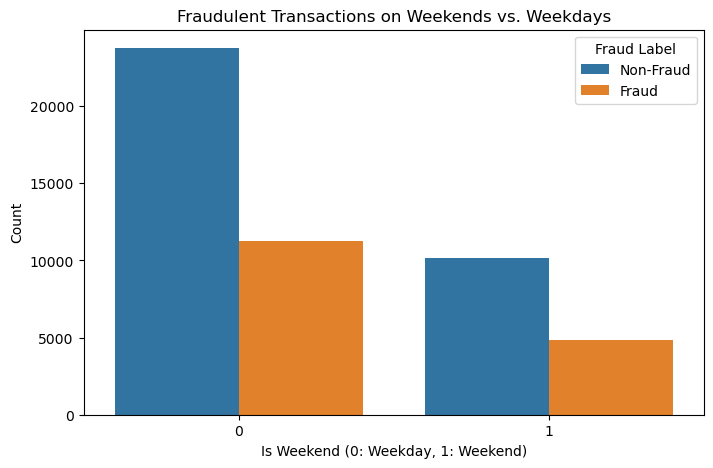

In [19]:
if 'Is_Weekend' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Is_Weekend', hue='Fraud_Label', data=df)
    plt.title('Fraudulent Transactions on Weekends vs. Weekdays')
    plt.xlabel('Is Weekend (0: Weekday, 1: Weekend)')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', labels=['Non-Fraud', 'Fraud'])
    plt.show()
else:
    print("Error: 'Is_Weekend' column is missing in DataFrame")